# 图像曝光算法

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [20]:
def togray(src):
    rgb = np.float64(src)
    dst = 0.299 * rgb[:,:,0] + 0.587 * rgb[:,:,1] + 0.114 * rgb[:,:,2]
    return cv2.convertScaleAbs(dst)

def exposure(src,exposure_value):
    dst = np.zeros_like(src)
    inverse = 255 - src
    gray = togray(src)
    idx = (gray < exposure_value)
    dr = dst[:,:,0]
    dg = dst[:,:,1]
    db = dst[:,:,2]
    sr = src[:,:,0]
    sg = src[:,:,1]
    sb = src[:,:,2]
    ir = inverse[:,:,0]
    ig = inverse[:,:,1]
    ib = inverse[:,:,2]
    
    dr[idx] = ir[idx]
    dg[idx] = ig[idx]
    db[idx] = ib[idx]
    
    dr[~idx] = sr[~idx]
    dg[~idx] = sg[~idx]
    db[~idx] = sb[~idx]
    
    return dst
#     dst = np.zeros(src.shape,dtype=np.float64)
#     rows,cols = src.shape[:2]
#     for i in range(rows):
#         for j in range(cols):
#             rgb = src[i,j]
#             gray = 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
#             if gray < exposure_value:
#                 dst[i,j] = 255 - rgb
#             else:
#                 dst[i,j] = src[i,j]
    
#     return cv2.convertScaleAbs(dst)

In [25]:
dst = exposure(src,64)

Text(0.5,1,'Explosure')

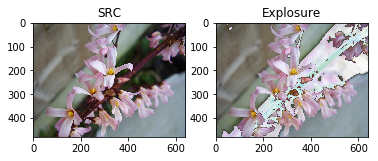

In [26]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Explosure')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/44992635